<a href="https://colab.research.google.com/github/MADHUPRIYAAA/2303a51583-batch-22/blob/main/projectcode2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression Classification Report ###
              precision    recall  f1-score   support

        High       0.67      0.67      0.67        51
         Low       0.74      0.78      0.76        50
      Medium       0.47      0.44      0.45        50

    accuracy                           0.63       151
   macro avg       0.62      0.63      0.63       151
weighted avg       0.62      0.63      0.63       151

--------------------------------------------------
### Decision Tree Classification Report ###
              precision    recall  f1-score   support

        High       0.61      0.82      0.70        51
         Low       0.73      0.74      0.73        50
      Medium       0.52      0.32      0.40        50

    accuracy                           0.63       151
   macro avg       0.62      0.63      0.61       151
weighted avg       0.62      0.63      0.61       151

--------------------------------------------------
### K-Nearest Neighbors (KNN) Classificati

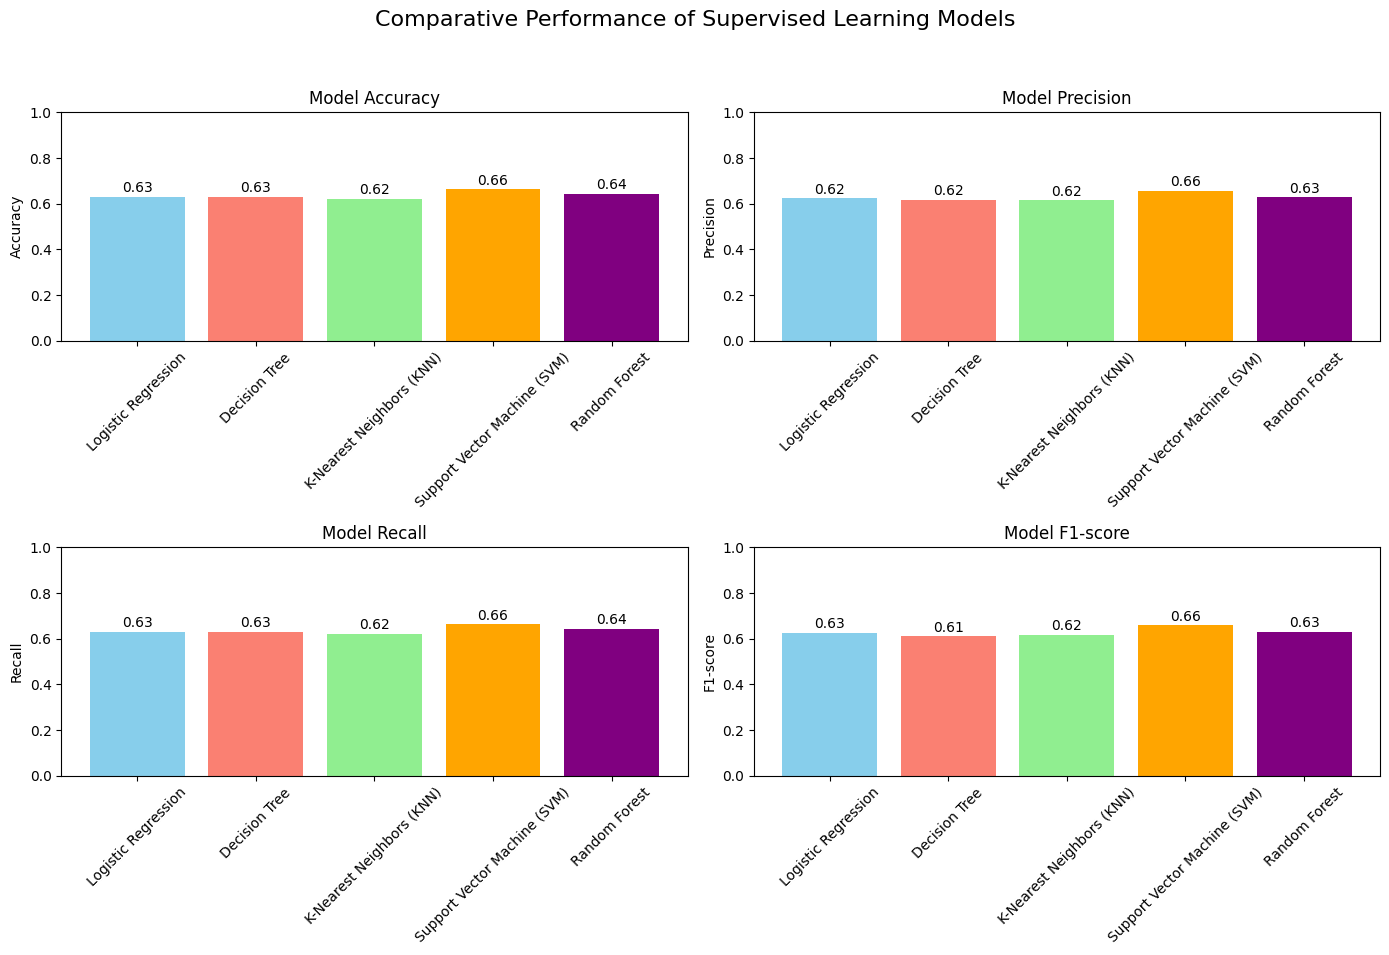

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np
import matplotlib.pyplot as plt

# --- Data Loading and Initial Preparation ---
def load_and_prepare_data(filepath='nutrition_cf - Sheet5 (1).csv'):
    """Loads, cleans, and prepares the dataset."""
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print("Error: The file was not found. Please ensure it's in the correct directory.")
        return None, None

    df['Carbon Footprint(kg CO2e)'] = pd.to_numeric(df['Carbon Footprint(kg CO2e)'], errors='coerce').fillna(0)
    bins = df['Carbon Footprint(kg CO2e)'].quantile([0, 0.33, 0.66, 1.0])
    labels = ['Low', 'Medium', 'High']
    df['Carbon_Footprint_Category'] = pd.cut(df['Carbon Footprint(kg CO2e)'], bins=bins, labels=labels, include_lowest=True)
    df = df.dropna(subset=['Carbon_Footprint_Category'])
    df['Associativity'] = df['Associativity'].astype(str)
    return df.drop(['Carbon_Footprint_Category', 'Carbon Footprint(kg CO2e)', 'Food', 'Ingredients'], axis=1), df['Carbon_Footprint_Category']

# --- Main Analysis Function ---
def run_analysis():
    """Executes the full machine learning analysis pipeline."""
    X, y = load_and_prepare_data()
    if X is None:
        return

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
        "Support Vector Machine (SVM)": SVC(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    results = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = report
        print(f"### {name} Classification Report ###")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

    plot_results(results)

# --- Plotting Function ---
def plot_results(results):
    """Plots a bar chart of model performance metrics."""
    metrics = {
        'Accuracy': [results[m]['accuracy'] for m in results],
        'Precision': [results[m]['weighted avg']['precision'] for m in results],
        'Recall': [results[m]['weighted avg']['recall'] for m in results],
        'F1-score': [results[m]['weighted avg']['f1-score'] for m in results]
    }
    model_names = list(results.keys())

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    fig.suptitle('Comparative Performance of Supervised Learning Models', fontsize=16)

    for i, (metric_name, metric_values) in enumerate(metrics.items()):
        ax = axes[i // 2, i % 2]
        ax.bar(model_names, metric_values, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
        ax.set_title(f'Model {metric_name}', fontsize=12)
        ax.set_ylim(0, 1.0)
        ax.set_ylabel(metric_name)
        ax.tick_params(axis='x', rotation=45)

        for index, value in enumerate(metric_values):
            ax.text(index, value + 0.02, f'{value:.2f}', ha='center')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Entry Point ---
if __name__ == "__main__":
    run_analysis()